In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import scipy.optimize
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]
rcParams.update({'font.size': 18})

(-0.5, 2009.5, 1047.5, -0.5)

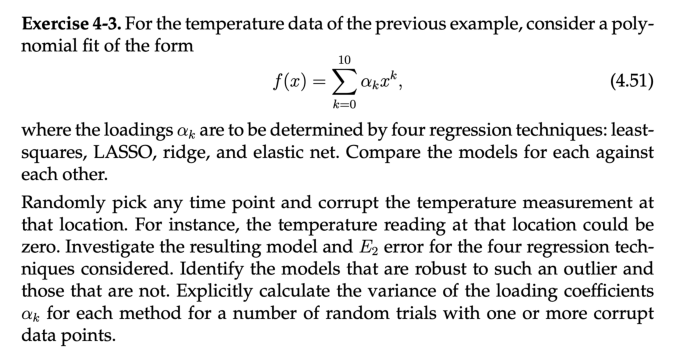

In [2]:
A = imread('4.3.png')
plt.imshow(A)
plt.axis('off')

In [3]:
y = np.array([75, 77, 76, 73, 69, 68, 63, 59, 57, 55, 54, 52, 50, 50, 49, 49, 49, 50, 54, 56, 59, 63, 67, 72])

In [4]:
#importing libraries for regression techniques
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


#specify degree of 3 for polynomial regression model
#include bias=False means don't force y-intercept to equal zero


In [5]:
x = np.arange(1, 25)
poly = PolynomialFeatures(degree=10, include_bias=False)

#reshape data to work properly with sklearn
poly_features = poly.fit_transform(x.reshape(-1, 1))

In [6]:
regressors = {
    "Least Squares": LinearRegression(),
    "LASSO": Lasso(alpha=0.01),  # Adjust alpha as needed
    "Ridge": Ridge(alpha=1.0),   # Adjust alpha as needed
    "Elastic Net": ElasticNet(alpha=0.01, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed
}

In [8]:
results = {}
for name, model in regressors.items():
    model.fit(poly_features, y)
    predicted_values = model.predict(poly_features)
    mse = mean_squared_error(y, predicted_values)
    results[name] = (model, mse)

/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.720e+01, tolerance: 2.145e-01
  model = cd_fast.enet_coordinate_descent(
/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.34021e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.713e+01, toler

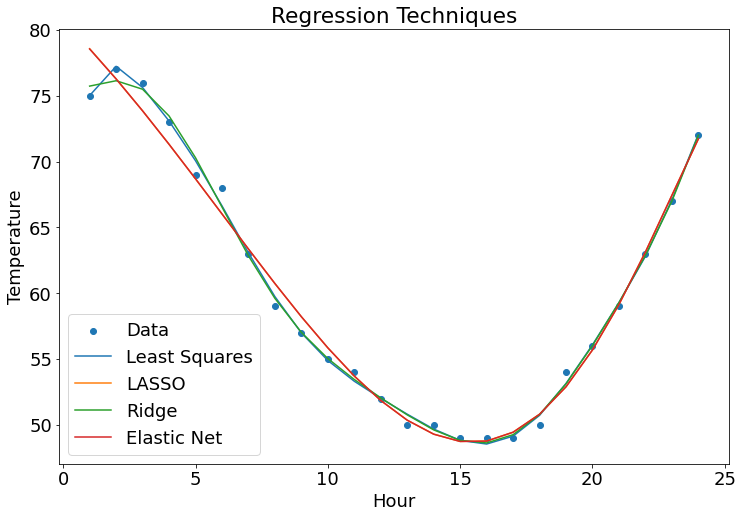

In [10]:
plt.scatter(x, y, label="Data")
for name, (model, _) in results.items():
    plt.plot(x, model.predict(poly_features), label=name)
plt.legend()
plt.title("Regression Techniques")
plt.xlabel("Hour")
plt.ylabel("Temperature")
plt.show()

In [11]:
for name, (_, mse) in results.items():
    print(f"{name} MSE: {mse}")

Least Squares MSE: 0.27631819838606414
LASSO MSE: 1.3912263048780567
Ridge MSE: 0.36198514389702585
Elastic Net MSE: 1.386085373662242


## Introducing outlier

In [12]:
outlier_index = np.random.choice(24)
y[outlier_index] = 0

In [14]:
results = {}
for name, model in regressors.items():
    model.fit(poly_features, y)
    predicted_values = model.predict(poly_features)
    mse = mean_squared_error(y, predicted_values)
    results[name] = (model, mse)

/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.105e+03, tolerance: 5.565e-01
  model = cd_fast.enet_coordinate_descent(
/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.34021e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.105e+03, toler

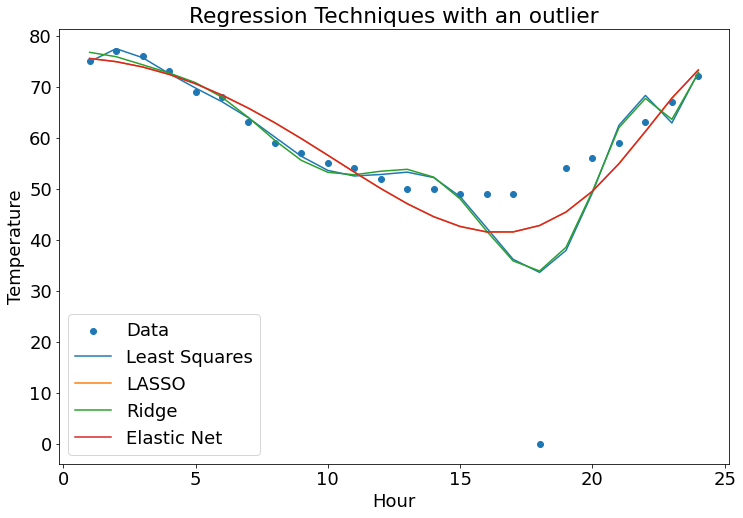

In [15]:
plt.scatter(x, y, label="Data")
for name, (model, _) in results.items():
    plt.plot(x, model.predict(poly_features), label=name)
plt.legend()
plt.title("Regression Techniques with an outlier")
plt.xlabel("Hour")
plt.ylabel("Temperature")
plt.show()

In [16]:
for name, (_, mse) in results.items():
    print(f"{name} MSE: {mse}")

Least Squares MSE: 71.87694453823529
LASSO MSE: 92.05714873332408
Ridge MSE: 72.45708646645336
Elastic Net MSE: 92.05558113636772


## Calculating variance of alpha_k

In [17]:
num_trials = 100
variances = {name: [] for name in regressors}

for _ in range(num_trials):
    # Introduce outliers in different trials
    outlier_index = np.random.choice(24)
    y[outlier_index] = 0

    for name, model in regressors.items():
        model.fit(poly_features, y)
        variances[name].append(np.var(model.coef_))

/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+03, tolerance: 8.803e-01
  model = cd_fast.enet_coordinate_descent(
/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.34021e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/venkatasaisarangrandhe/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+03, toler

In [18]:
for name, (_, mse) in results.items():
    print(f"{name} MSE: {mse}")

for name, var in variances.items():
    print(f"{name} Coefficient Variance (across trials): Mean={np.mean(var):.2f}, Std={np.std(var):.2f}")

Least Squares MSE: 71.87694453823529
LASSO MSE: 92.05714873332408
Ridge MSE: 72.45708646645336
Elastic Net MSE: 92.05558113636772
Least Squares Coefficient Variance (across trials): Mean=11240.72, Std=24263.46
LASSO Coefficient Variance (across trials): Mean=0.95, Std=2.01
Ridge Coefficient Variance (across trials): Mean=8.67, Std=10.99
Elastic Net Coefficient Variance (across trials): Mean=0.93, Std=1.98
